# Electromagnetism Lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib
from scipy import optimize
from statistics import stdev, pstdev
from IPython.display import display, Math
import matplotlib.patches as patches

plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update({'errorbar.capsize': 3})
%precision 20
np.set_printoptions(suppress=True) 

### Useful functions

In [2]:
def iterative_regression(x, y, x_err, y_err):
    n = np.shape(y)[0]
    weights_ = np.ones(n)
    popt, pcov = optimize.curve_fit(func, x, y,sigma = y_err, p0=(0,1))
    A,B = popt
    B_new = 100
    i = 1
    
    while np.abs(B-B_new)> 0.0001:
        i = i+1
        B = B_new
        y_err_tot = np.sqrt(y_err**2+(B_new**2)*x_err**2)
        #weighted regression
        popt, pcov = optimize.curve_fit(func, x, y,sigma = y_err_tot,p0=(0,1))
        A, B_new = popt
    sigma_A, sigma_B = np.sqrt(np.diag(pcov))
    print(("n.of iterations: %g")%(i))
    print(("A: %.5f, B: %.5f, sigma_A: %.5f, sigma_B: %.5f")%(A, B_new,sigma_A, sigma_B))
    
    return A, B_new, sigma_B, y_err_tot,n

In [3]:
def func(x,A, B):
    return A+B*x

## First part

In [4]:
g = 0.0098

In [5]:
df_1 = pd.read_csv('EM-parte1.txt',delimiter='\t')
df_2 = pd.read_csv('EM-parte2.txt',delimiter='\t')
df_1

,Corrente,errore_C,M_1,M_2,M_3,M_4,M_5,errlett_M
0,0.0,0.00,164.030,164.010,164.06,164.040,164.020,0.01
1,0.5,0.15,164.360,164.365,164.42,164.380,164.385,0.01
2,1.0,0.15,164.850,164.800,164.87,164.820,164.790,0.01
3,1.5,0.15,165.290,165.240,165.31,165.320,165.270,0.01
4,2.0,0.15,165.780,165.740,165.83,165.850,165.730,0.01
5,2.5,0.15,166.215,166.250,166.28,166.235,166.270,0.01
6,3.0,0.15,166.760,166.730,166.74,166.800,166.720,0.01
7,3.5,0.15,167.180,167.180,167.20,167.210,167.210,0.01
8,4.0,0.15,167.695,167.620,167.65,167.700,167.660,0.01
9,4.5,0.15,168.120,168.050,168.13,168.110,168.080,0.01


In [6]:
m0_values = np.concatenate((df_1.iloc[0,2:7].values,df_2.iloc[0,2:7].values))
m0_values

array([164.03 , 164.01 , 164.06 , 164.04 , 164.02 , 164.035, 164.055,
       164.04 , 164.04 , 164.03 ])

In [7]:
w_mean = np.round(m0_values.mean(),3)
w_err = np.round(stdev(m0_values),3) #std of the sample

print(("The magnet weight is %.3f +- %.3f")%(w_mean,w_err*3))

The magnet weight is 164.036 +- 0.045


In [8]:
#convertiamo in Newton
df_1_new = df_1.copy()
df_1_new.iloc[:,2:] = df_1_new.iloc[:,2:]*g
w_mean = w_mean*g #peso in netwon del magnete
w_err = w_err*g

In [9]:
df_1_new['y'] = np.round((df_1_new.iloc[:,2:7]-w_mean).mean(axis = 1).values,5)

y_err = np.zeros(df_1_new.shape[0])
for i in range(df_1_new.shape[0]):
    t = df_1_new.iloc[i:i+1,2:7].values - w_mean
    y_err[i] = stdev([item for sublist in t for item in sublist])
df_1_new['y_err'] = y_err*3

In [10]:
df_1_new = df_1_new.drop(columns=['M_1','M_2','M_3','M_4','M_5','errlett_M'])
df_1_new = df_1_new.iloc[1:,:]
df_1_new

,Corrente,errore_C,y,y_err
1,0.5,0.15,0.00339,0.000694
2,1.0,0.15,0.00774,0.000988
3,1.5,0.15,0.01225,0.000944
4,2.0,0.15,0.01715,0.001564
5,2.5,0.15,0.02170,0.000771
6,3.0,0.15,0.02660,0.000930
7,3.5,0.15,0.03097,0.000446
8,4.0,0.15,0.03556,0.000975
9,4.5,0.15,0.03981,0.000962


n.of iterations: 3
A: -0.00131, B: 0.00920, sigma_A: 0.00014, sigma_B: 0.00005


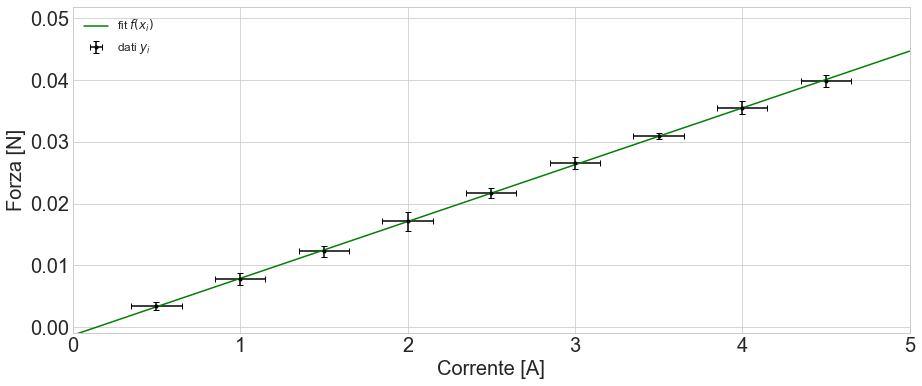

In [11]:
A, B,sigma_B, y_err_tot,n = iterative_regression(df_1_new['Corrente'].values,
                                               df_1_new['y'].values,
                                               df_1_new['errore_C'].values, 
                                               df_1_new['y_err'].values)
#plot
fig, ax = plt.subplots(figsize=(15, 6))
X_fit = np.arange(0, df_1_new['Corrente'].values.max()+0.5, 0.001).reshape(-1, 1)
Y_fit =A+ B*X_fit

    
plt.errorbar(df_1_new['Corrente'].values,df_1_new['y'].values, xerr = df_1_new['errore_C'].values, 
             yerr =  df_1_new['y_err'].values,linestyle = "None", fmt='.k',label='dati $y_i$')
plt.plot(X_fit, Y_fit, '-g',label='fit $f(x_i)$')
plt.xlim(0, df_1_new['Corrente'].values.max()+0.5)
plt.ylim(-0.001, df_1_new['y'].values.max()+0.012)
plt.xlabel('Corrente [A]', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylabel('Forza [N]', fontsize = 20)
plt.legend(loc=2, prop={'size': 12});
plt.show()

In [12]:
l = 8.4/100
delta_l = 0.2/100
delta_B = sigma_B*3
delta_B

0.0001514853501625298

In [13]:
print(("The magnetic field computed in the first part is: (%.5f +- %.5f) T")%(np.round(B/l,5),np.round(B/l,5)*(delta_B/B + delta_l/l)))

The magnetic field computed in the first part is: (0.10954 +- 0.00441) T


## Second part

In [14]:
df_2 = pd.read_csv('EM-parte2.txt',delimiter='\t')
df_2

,L,errore_L,M_1,M_2,M_3,M_4,M_5,errlett_M
0,0.0,0.0,164.035,164.055,164.04,164.04,164.03,0.01
1,1.2,0.2,164.380,164.390,164.38,164.37,164.39,0.01
2,2.2,0.2,164.690,164.710,164.71,164.72,164.69,0.01
3,3.2,0.2,165.050,165.070,165.08,165.06,165.08,0.01
4,4.2,0.2,165.450,165.430,165.44,165.42,165.43,0.01
5,6.4,0.4,166.080,166.070,166.08,166.06,166.07,0.01
6,8.4,0.4,166.790,166.760,166.78,166.75,166.76,0.01


In [15]:
#conversion in Newton
df_2.iloc[:,2:] = df_2.iloc[:,2:]*g
df_2.iloc[:,:2] = df_2.iloc[:,:2]/100
df_2 = df_2.iloc[1:,:]
df_2

,L,errore_L,M_1,M_2,M_3,M_4,M_5,errlett_M
1,0.012,0.002,1.610924,1.611022,1.610924,1.610826,1.611022,0.000098
2,0.022,0.002,1.613962,1.614158,1.614158,1.614256,1.613962,0.000098
3,0.032,0.002,1.617490,1.617686,1.617784,1.617588,1.617784,0.000098
4,0.042,0.002,1.621410,1.621214,1.621312,1.621116,1.621214,0.000098
5,0.064,0.004,1.627584,1.627486,1.627584,1.627388,1.627486,0.000098
6,0.084,0.004,1.634542,1.634248,1.634444,1.634150,1.634248,0.000098


In [16]:
df_2['y_2'] = np.round((df_2.iloc[:,2:7]-w_mean).mean(axis = 1).values,5)
y_err = np.zeros(df_2.shape[0])
for i in range(df_2.shape[0]):
    t = df_2.iloc[i:i+1,2:7].values - w_mean
    y_err[i] = stdev([item for sublist in t for item in sublist])
df_2['y_err_2'] = y_err*3

C:\Users\aless\AppData\Local\Temp/ipykernel_23340/3139550968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['y_2'] = np.round((df_2.iloc[:,2:7]-w_mean).mean(axis = 1).values,5)
C:\Users\aless\AppData\Local\Temp/ipykernel_23340/3139550968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['y_err_2'] = y_err*3


In [17]:
df_2_new = df_2.drop(columns=['M_1', 'M_2','M_3','M_4','M_5','errlett_M'])
df_2_new

,L,errore_L,y_2,y_err_2
1,0.012,0.002,0.00339,0.000246
2,0.022,0.002,0.00655,0.000394
3,0.032,0.002,0.01011,0.000383
4,0.042,0.002,0.01370,0.000335
5,0.064,0.004,0.01995,0.000246
6,0.084,0.004,0.02677,0.000483


n.of iterations: 4
A: -0.00043, B: 0.32645, sigma_A: 0.00026, sigma_B: 0.00693


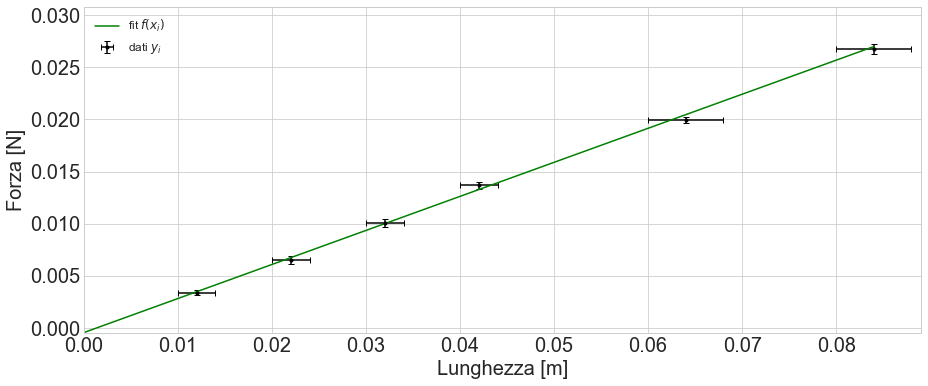

In [18]:
A_2, B_2, sigma_B_2, y_err_tot_2,n_2 = iterative_regression(df_2_new['L'].values,
                                                        df_2_new['y_2'].values,
                                                        df_2_new['errore_L'].values, 
                                                        df_2_new['y_err_2'].values)

fig, ax = plt.subplots(figsize=(15, 6))
X_fit_2 = np.arange(0, df_2_new['L'].values.max()+0.001, 0.001).reshape(-1, 1)
Y_fit_2 = A_2 + B_2*X_fit_2
    
plt.errorbar(df_2_new['L'].values, df_2_new['y_2'].values, xerr = df_2_new['errore_L'].values, 
             yerr = df_2_new['y_err_2'].values, linestyle = "None", fmt='.k',label='dati $y_i$')
plt.plot(X_fit_2, Y_fit_2, '-g', label='fit $f(x_i)$')
plt.xlim(0, df_2_new['L'].values.max()+0.005)
plt.ylim(-0.0005, df_2_new['y_2'].values.max()+0.004)
plt.ylabel('Forza [N]', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.xlabel('Lunghezza [m]', fontsize = 20)
plt.legend(loc=2, prop={'size': 12});
plt.show()

In [19]:
C = 3
delta_C = 0.15
delta_B_2 = sigma_B_2*3

In [20]:
print(("The magnetic field computed in the first part is: (%.5f +- %.5f) T")%(np.round(B_2/C,5),np.round(B_2/C,5)*(delta_B_2/B_2 + delta_C/C)))

The magnetic field computed in the first part is: (0.10882 +- 0.01237) T


### Scale calibration

In [21]:
x_3 = np.array([1.444,6.694,10.358,16.862,20,100,120])
y_3 = np.array([1.4,6.7,10.36,16.86,19.98,100,119.97])
y_err_3 = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01]) 
n_3 = np.shape(x_3)[0]

n.of iterations: 3
A: -0.01100, B: 0.99996, sigma_A: 0.01038, sigma_B: 0.00017


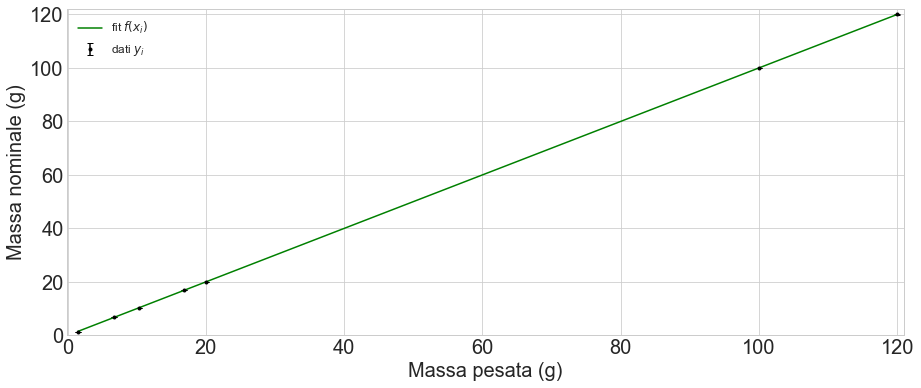

In [22]:
A_3, B_3, sigma_B_3, y_err_tot_3,n_3 = iterative_regression(x_3,y_3,np.zeros(n_3),y_err_3)

#plot
fig, ax = plt.subplots(figsize=(15, 6))
plt.errorbar(x_3, y_3, xerr = None, yerr = y_err_3,linestyle = "None", fmt='.k',label='dati $y_i$')

X_fit_3 = np.arange(x_3.min(), x_3.max(), 0.001).reshape(-1, 1)
Y_fit_3 = A_3 + B_3*X_fit_3

plt.plot(X_fit_3, Y_fit_3, '-g',  label='fit $f(x_i)$')
plt.xlim(-.1, x_3.max()+1)
plt.ylim(-0.001, y_3.max()+2)
plt.xlabel('Massa pesata (g)', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylabel('Massa nominale (g)', fontsize = 20)
plt.legend(loc=2, prop={'size': 12});
plt.show()

## Third part

Scipy provides a rather generic function (based on the Levenburg-Marquardt algorithm) via scipy.optimize.curve_fit to fit a given function to a given data set. The assumption is that we have been given a data set with points $x_{1}, x_{2}, ...x_{N}$ and corresponding function values $y_{i}$ and a dependence of $y_{i}$ on $x_{i}$ such that $y_{i}=f(x_{i},\vec{p})$. We want to determine the vector of parameters $\vec{p}=(p_{1},p_{2},...,p_{k})$ so that the sum of the residuals is as small as possible, i.e. minimizing the function:
$r=\sum_{i=1}^{N}(y_{i}-f(x_{i},\vec{p}))^{2}$

We then want to fit the function: $y = A cos(\omega x)$, this python function will help us derive estimates for the parameters $A$ and $\omega$

In [23]:
df_3 = pd.read_csv('EM-parte3.txt',delimiter='\t')
df_3

,angolo,massa,errore_angolo,errore_massa
0,-90,70.780,1,0.03
1,-70,71.120,1,0.03
2,-50,71.430,1,0.03
3,-35,71.590,1,0.03
4,-10,71.720,1,0.03
5,0,71.735,1,0.03
6,20,71.670,1,0.03
7,40,71.500,1,0.03
8,60,71.260,1,0.03
9,75,71.030,1,0.03


In [24]:
m0 = 70.81

In [25]:
x_data_1 = df_3['angolo'][:11] 
x_data_2 = df_3['angolo'][11:] 
y_data_1 = (df_3['massa'][:11] - m0)*g
y_data_2 = (df_3['massa'][11:] - m0)*g
y_data_1_err = df_3['errore_massa'][:11]*g
y_data_2_err = df_3['errore_massa'][11:]*g
x_data_1_err = df_3['errore_angolo'][:11]
x_data_2_err = df_3['errore_angolo'][11:]

In [26]:
A1 = y_data_1[5]- y_data_1[0]
A2 = y_data_2[16]- y_data_2[11]
print(("Width of the first set: %f, Width of the second set: %f")%(A1, A2))

Width of the first set: 0.009359, Width of the second set: -0.008918


In [27]:
def func(x, a, omega,c,d):
    return a * np.sin(omega *x+c)+d

We compute the magnetic field for both data sets and see if they are compatible

In [28]:
x_data_3 = np.concatenate((x_data_1,x_data_2+180), axis=None)
y_data_3 = np.concatenate((y_data_1,(y_data_2)), axis=None)
y_data_3_err = np.concatenate((y_data_1_err,y_data_2_err), axis=None)
x_data_3_err = np.concatenate((x_data_1_err,x_data_2_err), axis=None)

In [29]:
popt, pcov = optimize.curve_fit(func, x_data_3, y_data_3,sigma=y_data_3_err,p0=(1,0.016,0,1))
a, b,c,d = popt
print("Optimal parameters are A=%g, omega=%g, c =%g, d =%g" % (a, b,c,d))
# d is different from 0, because it may be that we have weighed the magnet incorrectly
print(("d = %f g")%(d/g))

Optimal parameters are A=-0.00932187, omega=0.0173173, c =-1.56129, d =-0.00025705
d = -0.026230 g


Make manual variation of the parameters and see which one fits best.

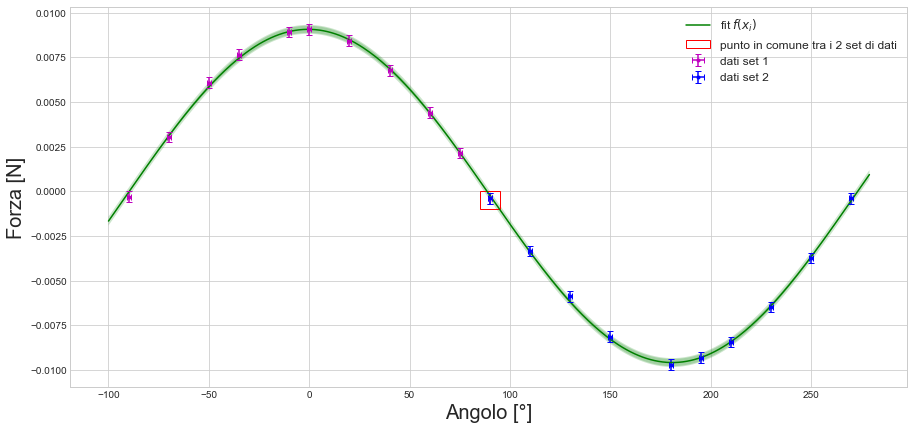

In [30]:
x_lista = np.arange(-100,280)
yfitted = func(x_lista, a,b,c,d)   # equivalent to f(x, popt[0], popt[1], popt[2])
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(x_lista, yfitted, '-g', label='fit $f(x_i)$')
plt.errorbar(x_data_1, y_data_1, yerr=y_data_1_err, xerr=x_data_1_err,fmt='.m',label='dati set 1')
plt.errorbar(x_data_2+180, y_data_2, yerr=y_data_2_err, xerr=x_data_2_err,fmt='.b',label='dati set 2')

y1 = func(x_lista, a,b,c,d+0.00025)
y2 = func(x_lista, a,b,c,d-0.00025)
y3 = func(x_lista, a+0.0002,b,c,d)
y4 = func(x_lista, a-0.0002,b,c,d)
y5 = func(x_lista, a,b+0.000001,c,d)
y6 = func(x_lista, a,b-0.000001,c,d)
y7 = func(x_lista, a,b,c+0.00018,d)
y8 = func(x_lista, a,b,c-0.00018,d)
#plt.plot(x_lista, y1, '-r', label='max A = 0.01015')
#plt.plot(x_lista, y2, '-b', label='min A = 0.0096')
plt.fill_between(x_lista, y1, y2, facecolor="green", alpha=0.2)
plt.fill_between(x_lista, y3, y4, facecolor="green", alpha=0.2)
plt.fill_between(x_lista, y5, y6, facecolor="green", alpha=0.2)
plt.fill_between(x_lista, y7, y8, facecolor="green", alpha=0.2)

ax.add_patch(patches.Rectangle(xy=(85, -0.001),width=10, height=0.001, linewidth=1, color='red', fill=False, 
                               label='punto in comune tra i 2 set di dati'))

plt.ylabel('Forza [N]', fontsize =20)
plt.xlabel('Angolo [°]', fontsize = 20)
plt.legend(loc=1, prop={'size': 12});
plt.show();

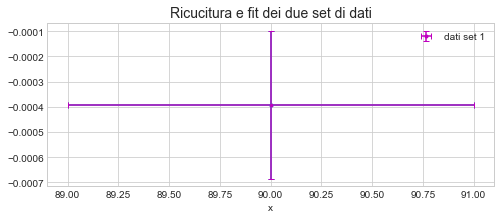

In [31]:
fig, ax = plt.subplots(figsize=(8, 3))
plt.title('Ricucitura e fit dei due set di dati', fontsize = 14)
plt.errorbar(x_data_2[0:1]+180, y_data_2[0:1], yerr=y_data_2_err[0:1], xerr=x_data_2_err[0:1],fmt='.c')
plt.errorbar(x_data_1[10:11], y_data_1[10:11], yerr=y_data_1_err[10:11], xerr=x_data_1_err[10:11],fmt='.m',label='dati set 1')

plt.xlabel('x', fontsize = 10)
plt.legend();

What could be done better? We could have had a larger overlapping dataset: in this case we would have added a smaller error on more points the overlapping error is smaller.

How to determine the error? In this case the observable I am looking for is the maximum Lorenz force from which I then derive the magnetic field, hence the amplitude of this sinusoid which is what I need. In this case we must determine the error of the amplitude A and the phase shift with respect to 0.

In [32]:
print(("a = (%.5f +- %.5f) N")%(a,(0.00025)))

a = (-0.00932 +- 0.00025) N


$F_{B} = ilBsin\theta \Rightarrow B = \frac{F_{B}}{ilsin\theta }$